Dataset: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset (Binary classified data, if an employee left or not)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample  #downsample the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Employee.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv(file_path,header=0)

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
df["JoiningYear"].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018])

In [ ]:
df["PaymentTier"].unique()

array([3, 1, 2])

In [ ]:
df["City"].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [ ]:
df["Age"].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41])

In [ ]:
df["EverBenched"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["ExperienceInCurrentDomain"].unique()

array([0, 3, 2, 5, 1, 4, 7, 6])

In [ ]:
len(df.loc[(df['Education']=='PHD') | (df["ExperienceInCurrentDomain"]==0)])

520

In [ ]:
len(df.loc[(df['Education']!='PHD') & (df["ExperienceInCurrentDomain"]!=0)])

4133

In [ ]:
df_clean=df.loc[(df['ExperienceInCurrentDomain']!=0) & (df["Education"]!='PHD')]

In [ ]:
df_clean['Education'].unique()

array(['Bachelors', 'Masters'], dtype=object)

In [ ]:
#downsample
len(df_clean)

4133

In [ ]:
df_no_leave=df_clean[df_clean['LeaveOrNot']==0]
df_leave=df_clean[df_clean['LeaveOrNot']==1]

In [ ]:
df_no_leave_downsample=resample(df_no_leave,replace=False,n_samples=1000, random_state=2)
len(df_no_leave_downsample)

1000

In [ ]:
df_leave_downsample=resample(df_leave,replace=False,n_samples=1000, random_state=2)
len(df_leave_downsample)

1000

In [ ]:
df_downsample=pd.concat([df_no_leave_downsample,df_leave_downsample])
len(df_downsample)

2000

In [ ]:
#split the data as X and y
X=df_downsample.drop('LeaveOrNot',axis=1).copy()
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
857,Bachelors,2017,New Delhi,2,28,Male,No,1
3547,Bachelors,2017,New Delhi,3,35,Female,No,5
4633,Bachelors,2016,Bangalore,3,37,Male,No,2
4258,Bachelors,2014,Bangalore,3,37,Male,No,5
611,Bachelors,2014,Pune,3,26,Male,No,4


In [ ]:
y=df_downsample['LeaveOrNot'].copy()
y.head()

857     0
3547    0
4633    0
4258    0
611     0
Name: LeaveOrNot, dtype: int64

In [ ]:
#one hot encoding
pd.get_dummies(X, columns=['Education']).head()

,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters
857,2017,New Delhi,2,28,Male,No,1,1,0
3547,2017,New Delhi,3,35,Female,No,5,1,0
4633,2016,Bangalore,3,37,Male,No,2,1,0
4258,2014,Bangalore,3,37,Male,No,5,1,0
611,2014,Pune,3,26,Male,No,4,1,0


In [ ]:
df_downsample.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
X_encoded=pd.get_dummies(X, columns=['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain'])
X_encoded.head()

,Education_Bachelors,Education_Masters,JoiningYear_2012,JoiningYear_2013,JoiningYear_2014,JoiningYear_2015,JoiningYear_2016,JoiningYear_2017,JoiningYear_2018,City_Bangalore,...,Gender_Male,EverBenched_No,EverBenched_Yes,ExperienceInCurrentDomain_1,ExperienceInCurrentDomain_2,ExperienceInCurrentDomain_3,ExperienceInCurrentDomain_4,ExperienceInCurrentDomain_5,ExperienceInCurrentDomain_6,ExperienceInCurrentDomain_7
857,1,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
3547,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4633,1,0,0,0,0,0,1,0,0,1,...,1,1,0,0,1,0,0,0,0,0
4258,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
611,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=2)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [ ]:
#SVM
svm_model=SVC(random_state=2)


In [ ]:
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=2)

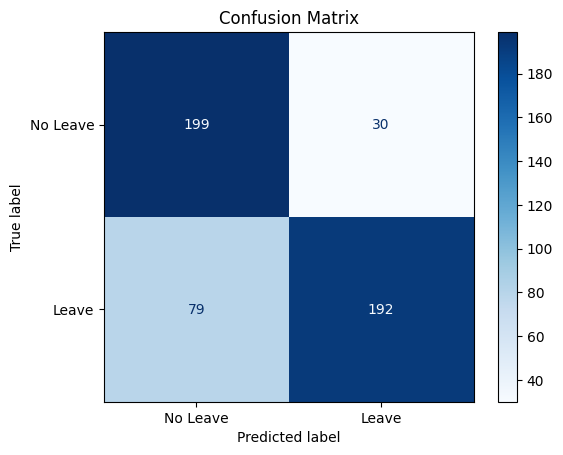

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Leave', 'Leave'])
display.plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
param_grid=[{'C':[0.5,1,10,100],
            'gamma':['scale',1,0.1,.01,0.001,0.0001],
            'kernel':['rbf']}]

In [ ]:
opt_param=GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)

In [ ]:
opt_param.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [ ]:
print(opt_param.best_score_)

0.8019999999999999


In [ ]:
model_svm=SVC(random_state=2,C=1.0,gamma='scale')
model_svm.fit(X_train_scaled,y_train)

SVC(random_state=2)

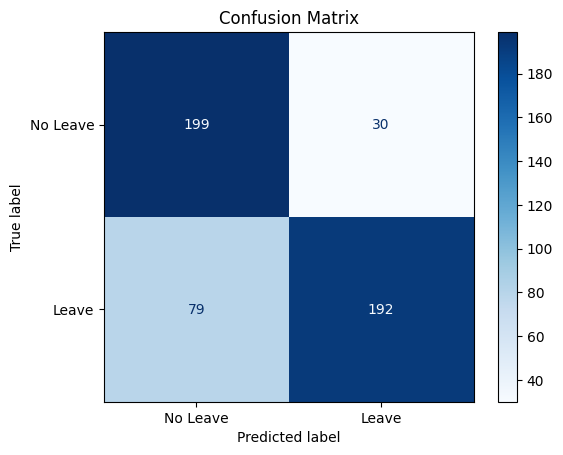

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Leave', 'Leave'])
display.plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()